<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #5: TF-IDF

### Jairo Iván Ordóñez

#### Grupo 51
`Fecha de entrega: Septiembre 19, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [35]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

import seaborn as sn
import matplotlib.pyplot as plt

# Punto 1: Pre-Procesamiento

- `[18 pts]` Leer el archivo `Princesas.csv` usando `pandas` y crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [36]:
datosPrincesas = pd.read_csv(r'./Princesas.csv')
datosPrincesas

,Princesa,Personalidad
0,Blancanieves,Blancanieves es una princesa de noble cuna que...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ..."
3,Bella,Bella es una muchacha que vive en la campiña f...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince..."
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil..."
6,Mulan,Mulan es atípica a los anteriores papeles feme...
7,Tiana,Es una joven camarera que sueña con ser dueña ...
8,Mérida,Mérida llama la atención por su característico...
9,Moana,"Moana, una joven de 16 años de edad, hija únic..."


In [37]:
def procesando_textos(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

In [38]:
datosPrincesas['pre-procesado'] = datosPrincesas['Personalidad'].apply(lambda texto: procesando_textos(texto))
datosPrincesas

,Princesa,Personalidad,pre-procesado
0,Blancanieves,Blancanieves es una princesa de noble cuna que...,blancaniev princes nobl cun ve forz servidumbr...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...,cenicient inicial sirvient cas constant objet ...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ...",princes auror bell durmient hij unic rein flor...
3,Bella,Bella es una muchacha que vive en la campiña f...,bell muchach viv campiñ frances padr inventor ...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince...",introduj primer vez princes jasmin poc dias de...
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil...",nombr pocahont signif pequeñ silenci bas figur...
6,Mulan,Mulan es atípica a los anteriores papeles feme...,mul atip anterior papel femenin pelicul disney...
7,Tiana,Es una joven camarera que sueña con ser dueña ...,jov camarer sueñ ser dueñ propi restaur algun ...
8,Mérida,Mérida llama la atención por su característico...,mer llam atencion caracterist pel anaranj oscu...
9,Moana,"Moana, una joven de 16 años de edad, hija únic...",moan jov años edad hij unic sucesor import jef...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

In [39]:
tfidf_vect = TfidfVectorizer()
tfidfPrincesas = tfidf_vect.fit_transform(datosPrincesas['pre-procesado'].values)

tfidfPrincesas_matriz = pd.DataFrame(tfidfPrincesas.toarray(), columns=tfidf_vect.get_feature_names())
tfidfPrincesas_matriz.index = datosPrincesas['Princesa'].values
tfidfPrincesas_matriz.T.round(3)

,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
abrum,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
abuel,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.102
acuerd,0.000,0.0,0.056,0.000,0.000,0.000,0.0,0.000,0.08,0.000
ademas,0.000,0.0,0.000,0.000,0.000,0.099,0.0,0.000,0.00,0.000
afortun,0.087,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.0,0.000,0.074,0.000,0.000,0.0,0.000,0.00,0.087
volunt,0.000,0.0,0.000,0.000,0.161,0.000,0.0,0.000,0.00,0.000
volv,0.000,0.0,0.065,0.000,0.000,0.000,0.0,0.000,0.00,0.000
vudu,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.122,0.00,0.000


In [40]:
# tfidf_matrix

# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de las princesas


In [41]:
distanciaCosenoPrincesas = cosine_distances(tfidfPrincesas_matriz.values)
distanciaCosenoPrincesas = pd.DataFrame(distanciaCosenoPrincesas
                                        , columns = tfidfPrincesas_matriz.T.columns
                                        , index = tfidfPrincesas_matriz.T.columns)
distanciaCosenoPrincesas

,Blancanieves,Cenicienta,Aurora,Bella,Jasmín,Pocahontas,Mulan,Tiana,Mérida,Moana
Blancanieves,0.000000,0.846412,0.842647,0.918152,0.935368,0.922360,0.884287,0.960222,0.985292,0.951577
Cenicienta,0.846412,0.000000,0.858739,0.947104,0.959291,0.960478,0.932651,0.918932,0.970976,0.974964
Aurora,0.842647,0.858739,0.000000,0.833179,0.937415,0.869588,0.919588,0.939219,0.941046,0.966101
Bella,0.918152,0.947104,0.833179,0.000000,0.888222,0.890872,0.881828,0.973240,0.943696,0.923915
Jasmín,0.935368,0.959291,0.937415,0.888222,0.000000,0.942943,0.935293,0.937768,0.972673,0.969241
Pocahontas,0.922360,0.960478,0.869588,0.890872,0.942943,0.000000,0.888900,0.968881,0.979760,0.936306
Mulan,0.884287,0.932651,0.919588,0.881828,0.935293,0.888900,0.000000,0.991148,0.987323,0.946011
Tiana,0.960222,0.918932,0.939219,0.973240,0.937768,0.968881,0.991148,0.000000,0.979348,0.971543
Mérida,0.985292,0.970976,0.941046,0.943696,0.972673,0.979760,0.987323,0.979348,0.000000,0.971959
Moana,0.951577,0.974964,0.966101,0.923915,0.969241,0.936306,0.946011,0.971543,0.971959,0.000000


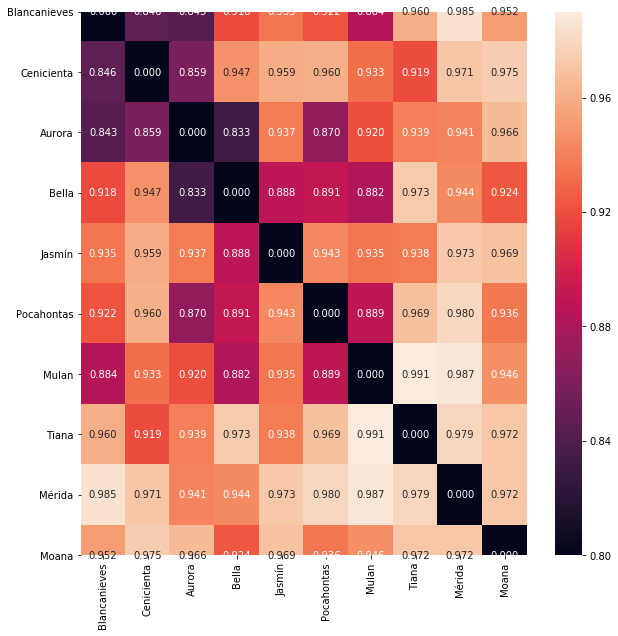

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(distanciaCosenoPrincesas
           , annot=True
           , vmin=0.8
           , vmax=0.99 
           , fmt=".3f"
           , ax=ax
          )

- `[2 pts]` ¿Cuáles son las princesas más parecidas?

### Respuesta: 

Las princesas más parecidas son:
* Blancanieves y Cenicienta
* Blancanieves y Aurora
* Aurora y Bella

- `[2 pts]` ¿Cuáles son las princesas más diferentes?

### Respuesta:

Las princesas más diferentes son:
* Tiana y Mulán
* Mérida y Mulán